In [1]:
import pandas as pd
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
train_test_data=[df]

for i in train_test_data:
    i["Title"]=i["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [3]:
df["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Don           1
Jonkheer      1
Lady          1
Capt          1
Ms            1
Mme           1
Sir           1
Name: Title, dtype: int64

In [4]:
df.replace(["Mr","Miss","Mrs","Master","Col","Rev","Dr","Don","Ms","Mlle","Sir","Capt","Lady","Major","Mme","Jonkheer","Countess"],[0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
df.drop("Name",inplace=True,axis="columns")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [6]:
df["Age"].fillna(df.groupby("Title")["Age"].transform("median"),inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


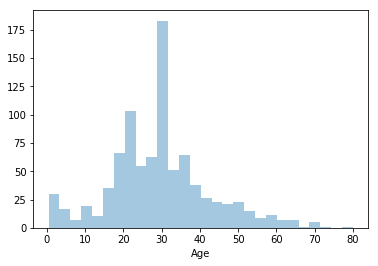

In [8]:
import seaborn as sns
print(sns.distplot(df["Age"],kde=False))

In [9]:
df["Age"] = pd.cut(df["Age"], bins=[0,16,40,100], labels=[0,1,2])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,1,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,1,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,1,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,1,0,0,373450,8.0500,NaN,S,0


(644, 12)
(168, 12)


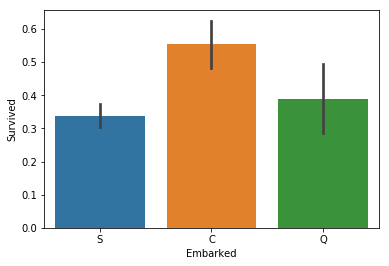

In [10]:
g = df.groupby("Embarked")
print(g.get_group("S").shape)
print(g.get_group("C").shape)
g.get_group("Q").shape
# sns.countplot(df["Embarked"])
sns.barplot(df["Embarked"],df["Survived"])
# sns.jointplot(df["Embarked"],df["Survived"])

In [11]:
df["Embarked"].fillna("S",inplace=True)
df.replace(["S","Q","C"],[0,1,2],inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null category
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 77.6+ KB


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


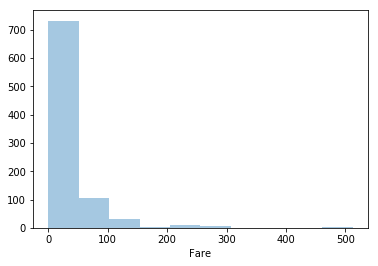

In [12]:
import seaborn as sns
sns.distplot(df["Fare"],kde=False,bins=10)

In [13]:
df["Fare"] = pd.cut(df["Fare"], bins=[-0.1,30,100,600], labels=[0,1,2])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null category
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null category
Cabin          204 non-null object
Embarked       891 non-null int64
Title          891 non-null int64
dtypes: category(2), int64(7), object(3)
memory usage: 71.6+ KB


In [14]:
df["Familysize"]=df["SibSp"]+df["Parch"]+1
df.replace(["male","female"],[0,1],inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Familysize
0,1,0,3,0,1,1,0,A/5 21171,0,NaN,0,0,2
1,2,1,1,1,1,1,0,PC 17599,1,C85,2,2,2
2,3,1,3,1,1,0,0,STON/O2. 3101282,0,NaN,0,1,1
3,4,1,1,1,1,1,0,113803,1,C123,0,2,2
4,5,0,3,0,1,0,0,373450,0,NaN,0,0,1


In [15]:
df.drop(["SibSp","Parch","Cabin","Ticket"],inplace=True,axis='columns')
df.head()
# df.info()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Familysize
0,1,0,3,0,1,0,0,0,2
1,2,1,1,1,1,1,2,2,2
2,3,1,3,1,1,0,0,1,1
3,4,1,1,1,1,1,0,2,2
4,5,0,3,0,1,0,0,0,1


In [16]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=1, stop=200, num = 4)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(1, 50, num = 11)]
max_depth.append(None)
min_samples_split = [2, 3, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

model = RandomForestClassifier()

y=df["Survived"]
df.drop("Survived",axis='columns',inplace=True)
X=df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = 3)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': [1, 67, 133, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None], 'min_samples_split': [2, 3, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [21]:
# model = LogisticRegression()
model = RandomForestClassifier(**rf_random.best_params_)
# model = KNeighborsClassifier()
# model = SVC(kernel="rbf", C=5)
# model = DecisionTreeClassifier()
# model = GaussianNB()
# model = XGBClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
print(model.score(X_test,y_test))
from sklearn.metrics import confusion_matrix
yp = model.predict(X_test)
cm = confusion_matrix(yp, y_test)
cm

0.8715083798882681


array([[99, 12],
       [11, 57]], dtype=int64)